# RSI 经典策略（2800.HK）

- Mean Reversion 思路：RSI 低于阈值买入；（可选）RSI 高于阈值做空
- 数据与回测假设同 `strategy_macd.ipynb`


days                         733.000000
total_return                   0.132496
buyhold_total_return           0.443585
annualized_return              0.043704
buyhold_annualized_return      0.134528
annualized_volatility          0.033386
sharpe_ratio                   1.297698
max_drawdown                  -0.002906
avg_trade_day_return           0.015878
coverage                       0.010914
transaction_cost_bp            2.000000
dtype: float64


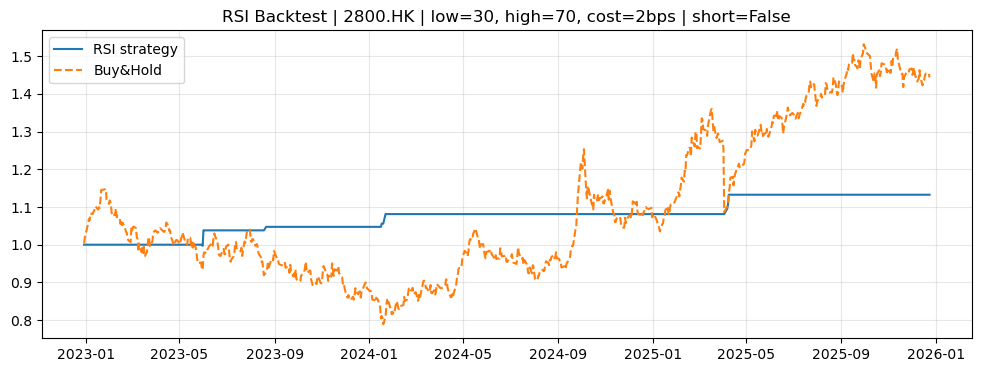

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fyp_trading.data import fetch_prices
from fyp_trading.backtest import equity_and_stats_from_positions
from fyp_trading.strategies import RsiConfig, rsi_mean_reversion_signal

TICKER = "2800.HK"
PERIOD = "3y"
INTERVAL = "1d"
TRANSACTION_COST_BP = 2.0
ALLOW_SHORT = False

# 可在报告里做一个小网格搜索（low/high）
CFG = RsiConfig(period=14, low=30, high=70, allow_short=ALLOW_SHORT)

df = fetch_prices(TICKER, PERIOD, INTERVAL)
close = df["Close"].copy()

sig = rsi_mean_reversion_signal(close, CFG)
next_ret = np.log(close.shift(-1) / close)
simple_ret = np.exp(next_ret) - 1.0

bt_df, stats = equity_and_stats_from_positions(
    simple_return=simple_ret.dropna(),
    position=sig.loc[simple_ret.dropna().index],
    transaction_cost_bp=TRANSACTION_COST_BP,
)

print(pd.Series(stats))

plt.figure(figsize=(12,4))
plt.plot(bt_df["strategy_equity"], label="RSI strategy")
plt.plot(bt_df["buyhold_equity"], label="Buy&Hold", linestyle="--")
plt.title(
    f"RSI Backtest | {TICKER} | low={CFG.low}, high={CFG.high}, cost={TRANSACTION_COST_BP:.0f}bps | short={ALLOW_SHORT}"
)
plt.legend()
plt.grid(alpha=0.3)
plt.show()
